In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


train=pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
test=pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [4]:
train.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3440475,2634,132,3,166,38,1247,251,210,119,3597,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2470812,2769,89,5,633,10,626,177,209,178,-12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2,536780,2749,46,30,127,239,2569,206,216,144,1899,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
3,3115135,2574,155,20,279,1,1932,205,189,199,461,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,81861,2779,91,19,523,-2,2976,240,246,105,1603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
data = train.copy()
data = data[data['Cover_Type']  train['Cover_Type'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Cover_Type",fontsize=15)
sns.distplot(data['Cover_Type'])
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2949201254.py, line 2)

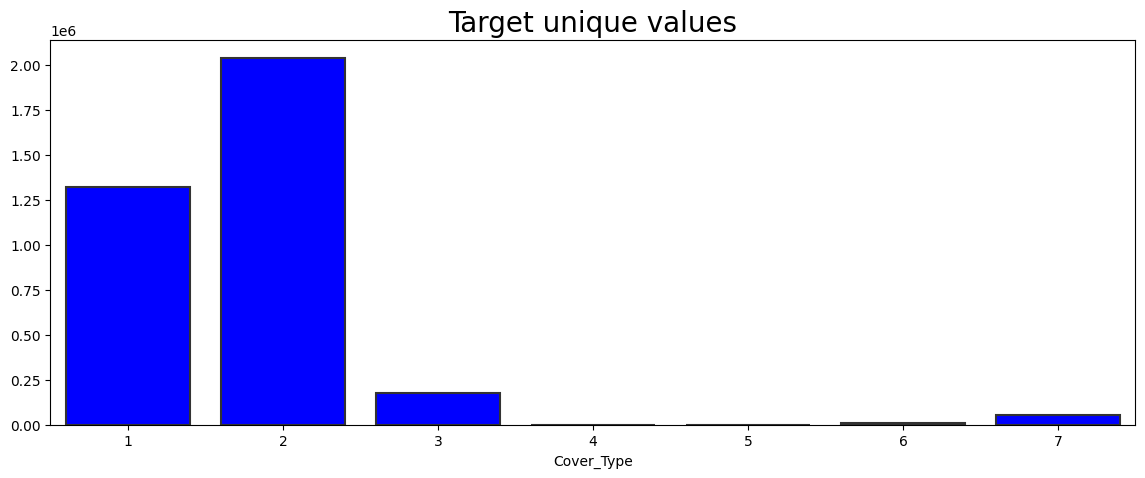

In [6]:
plt.figure(figsize=(14,5))
target_values = train['Cover_Type'].value_counts()
sns.barplot(x=target_values.index, y=target_values.values,linewidth=1.5, facecolor='blue',
                 errcolor=".2", edgecolor=".2")
plt.title("Target unique values", fontdict={'fontsize':20})
plt.show()


In [7]:
test.shape,train.shape


((400000, 55), (3600000, 56))

In [8]:
train['Cover_Type'].unique()


array([2, 1, 7, 3, 6, 4, 5])

In [9]:
train[train['Cover_Type']==1].shape,train[train['Cover_Type']==2].shape,train[train['Cover_Type']==3].shape


((1320866, 56), (2036254, 56), (176184, 56))

In [10]:
train[train['Cover_Type']==6].shape,train[train['Cover_Type']==7].shape,train[train['Cover_Type']==4].shape,train[train['Cover_Type']==5].shape


((10237, 56), (56125, 56), (333, 56), (1, 56))

In [11]:
train.describe()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3600000.0,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3600000.0,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06
mean,2.000069e+06,2.980147e+03,1.515727e+02,1.510050e+01,2.712761e+02,5.166790e+01,1.766483e+03,2.118390e+02,2.210576e+02,1.408136e+02,1.581520e+03,2.612136e-01,4.166917e-02,6.535808e-01,2.180222e-02,1.690667e-02,3.087306e-02,4.293611e-03,3.790556e-02,1.572194e-02,7.965000e-03,0.0,2.910278e-03,1.085361e-02,5.452167e-02,2.796472e-02,1.831333e-02,3.128056e-02,1.497556e-02,0.0,1.589889e-02,2.066694e-02,1.343750e-02,1.379806e-02,1.739222e-02,1.154361e-02,3.134306e-02,4.917139e-02,2.502500e-02,3.258611e-03,1.353389e-02,1.177833e-02,1.072361e-02,2.225278e-02,2.882028e-02,2.750583e-02,3.746250e-02,3.785972e-02,1.201639e-02,1.604194e-02,1.068556e-02,1.219861e-02,4.074917e-02,3.924222e-02,3.158944e-02,1.771544e+00
std,1.154820e+06,2.890440e+02,1.099497e+02,8.546351e+00,2.265100e+02,6.822503e+01,1.315661e+03,3.075498e+01,2.223373e+01,4.367894e+01,1.127627e+03,4.392962e-01,1.998321e-01,4.758287e-01,1.460373e-01,1.289218e-01,1.729738e-01,6.538484e-02,1.909679e-01,1.243976e-01,8.889072e-02,0.0,5.386844e-02,1.036138e-01,2.270442e-01,1.648718e-01,1.340819e-01,1.740750e-01,1.214549e-01,0.0,1.250844e-01,1.422667e-01,1.151388e-01,1.166519e-01,1.307277e-01,1.068193e-01,1.742432e-01,2.162258e-01,1.562010e-01,5.699117e-02,1.155453e-01,1.078870e-01,1.029981e-01,1.475046e-01,1.673012e-01,1.635520e-01,1.898923e-01,1.908569e-01,1.089587e-01,1.256368e-01,1.028172e-01,1.097716e-01,1.977086e-01,1.941708e-01,1.749044e-01,8.940261e-01
min,0.000000e+00,1.773000e+03,-3.300000e+01,-3.000000e+00,-8.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,-2.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.997378e+05,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,7.810000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+0

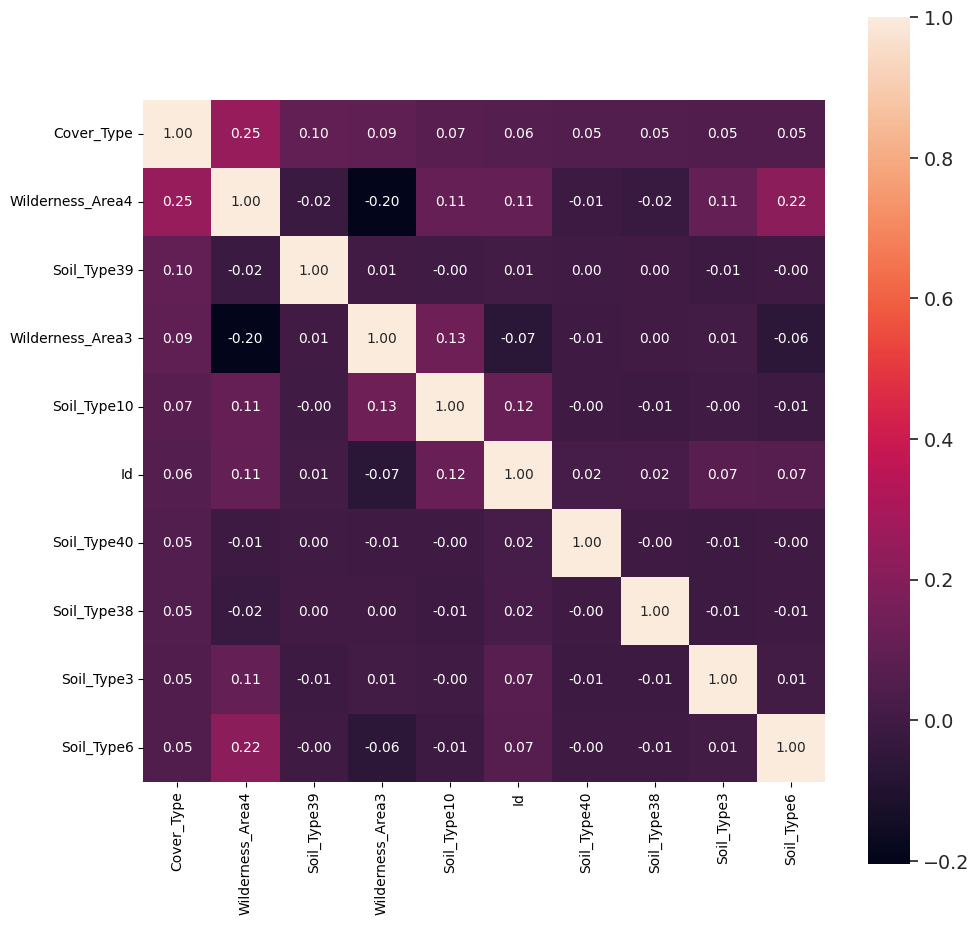

In [12]:
k = 10
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'Cover_Type')['Cover_Type'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [13]:
train.isnull().sum()


Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [14]:
y=train.pop('Cover_Type')
id_=train.pop('Id')
id_test=test.pop('Id')


In [15]:
from catboost import CatBoostClassifier
model = CatBoostClassifier( task_type = 'GPU',devices = '0')
model.fit(train, y)


CatBoostError: catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

In [16]:
sub = pd.read_csv('../input/tabular-playground-series-dec-2021/sample_submission.csv')
sub['Cover_Type'] =model.predict(test)
sub.to_csv("submission.csv",index=False)
sub.head()


CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.